In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection  import cross_val_score

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [2]:
df = pd.read_csv("baseball.csv")

# EDA

In [3]:
df.shape

(30, 17)

Dataset is very small we have 30 rows and 17 columns

In [4]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [5]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


We can check standard deviation and other parameters from above

In [6]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [7]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

We dont have any null value in dataset

In [8]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


We dont have any duplicate rows in dataset

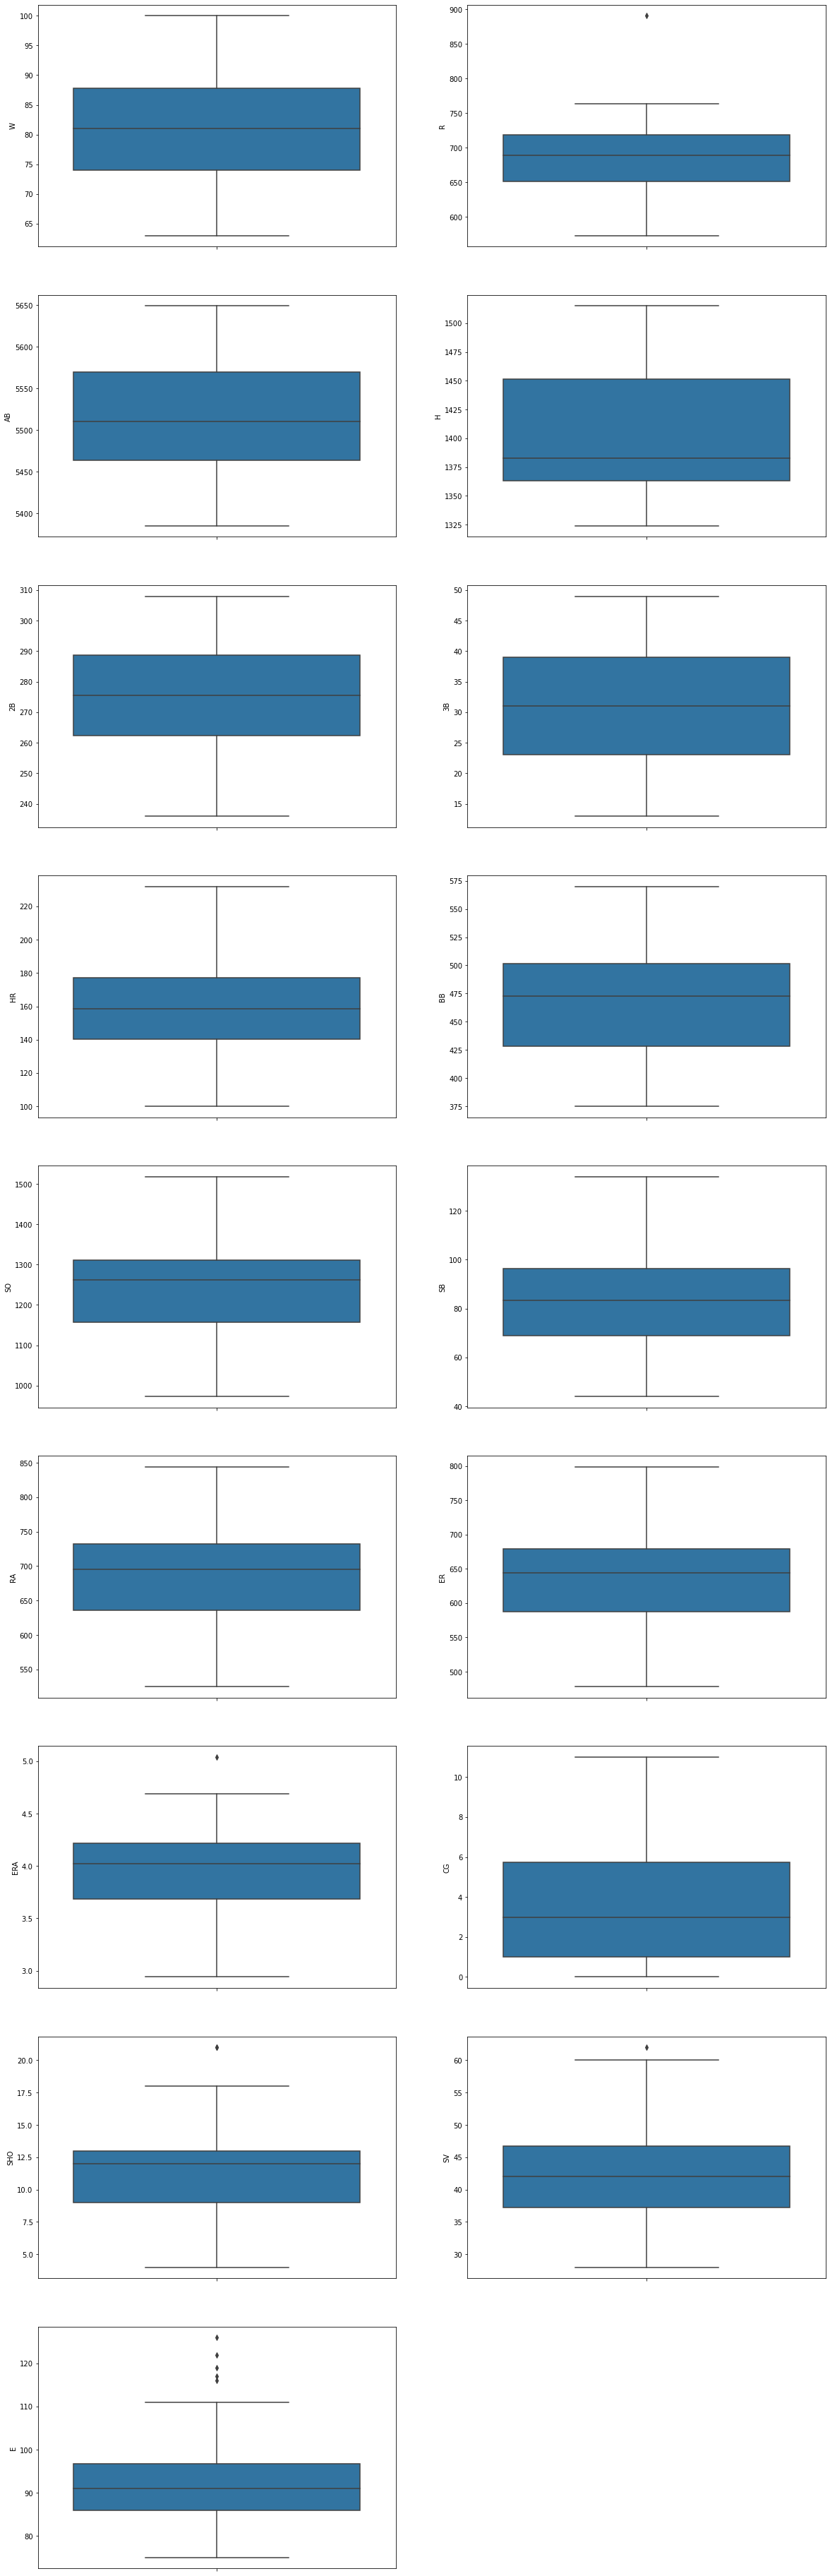

In [9]:
import seaborn as sns

counter=1;
plt.figure(figsize=(20,150))
for column in df.columns:
        plt.subplot(20,2,counter)
        counter=counter+1
        sns.boxplot(y=column,hue=column,data=df)

Outliers are present in 'R','ERA','SHO','SV','E'

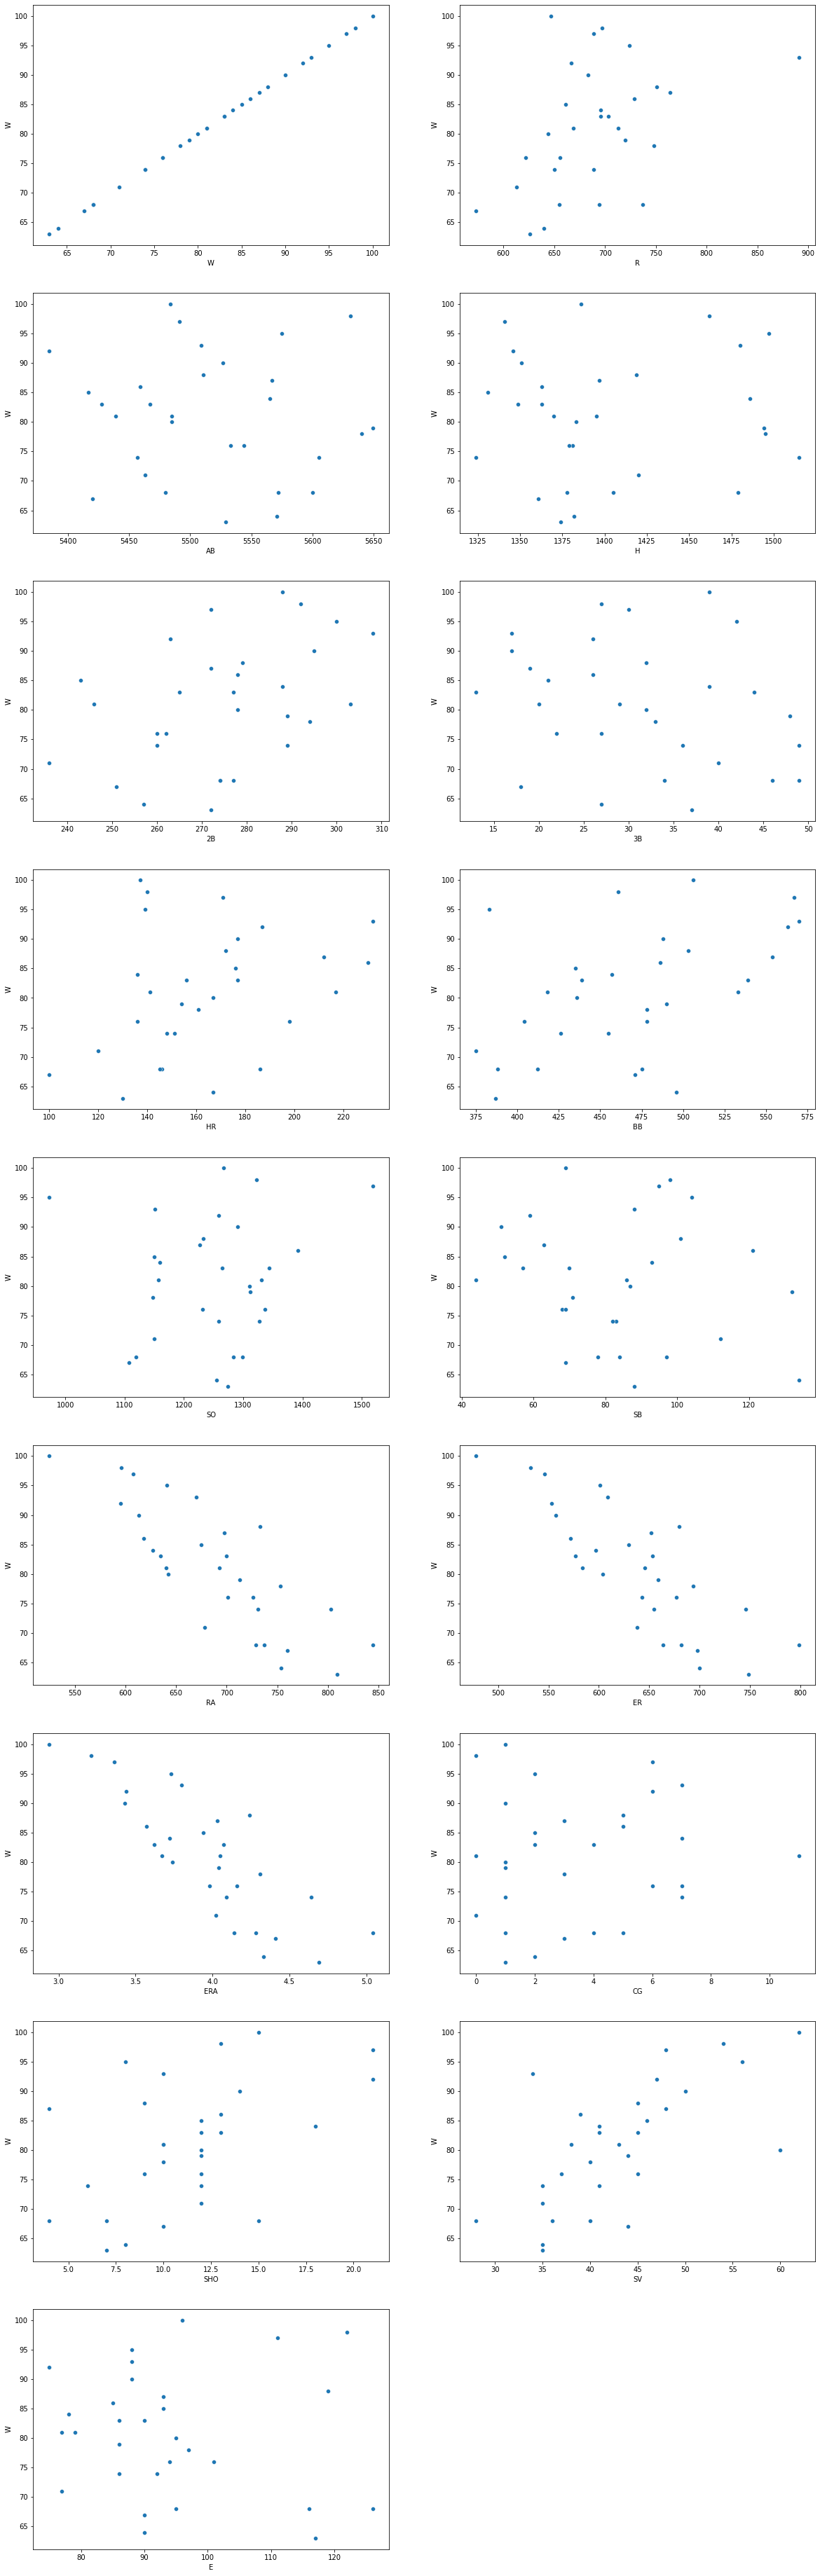

In [10]:
counter=1
plt.figure(figsize=(20,150))
for i in df.columns:
        plt.subplot(20,2,counter)
        counter=counter+1
        sns.scatterplot(x=i,y='W',data=df)

We can observer that ERA,ER,RA is showing slight negative linear relationship with W

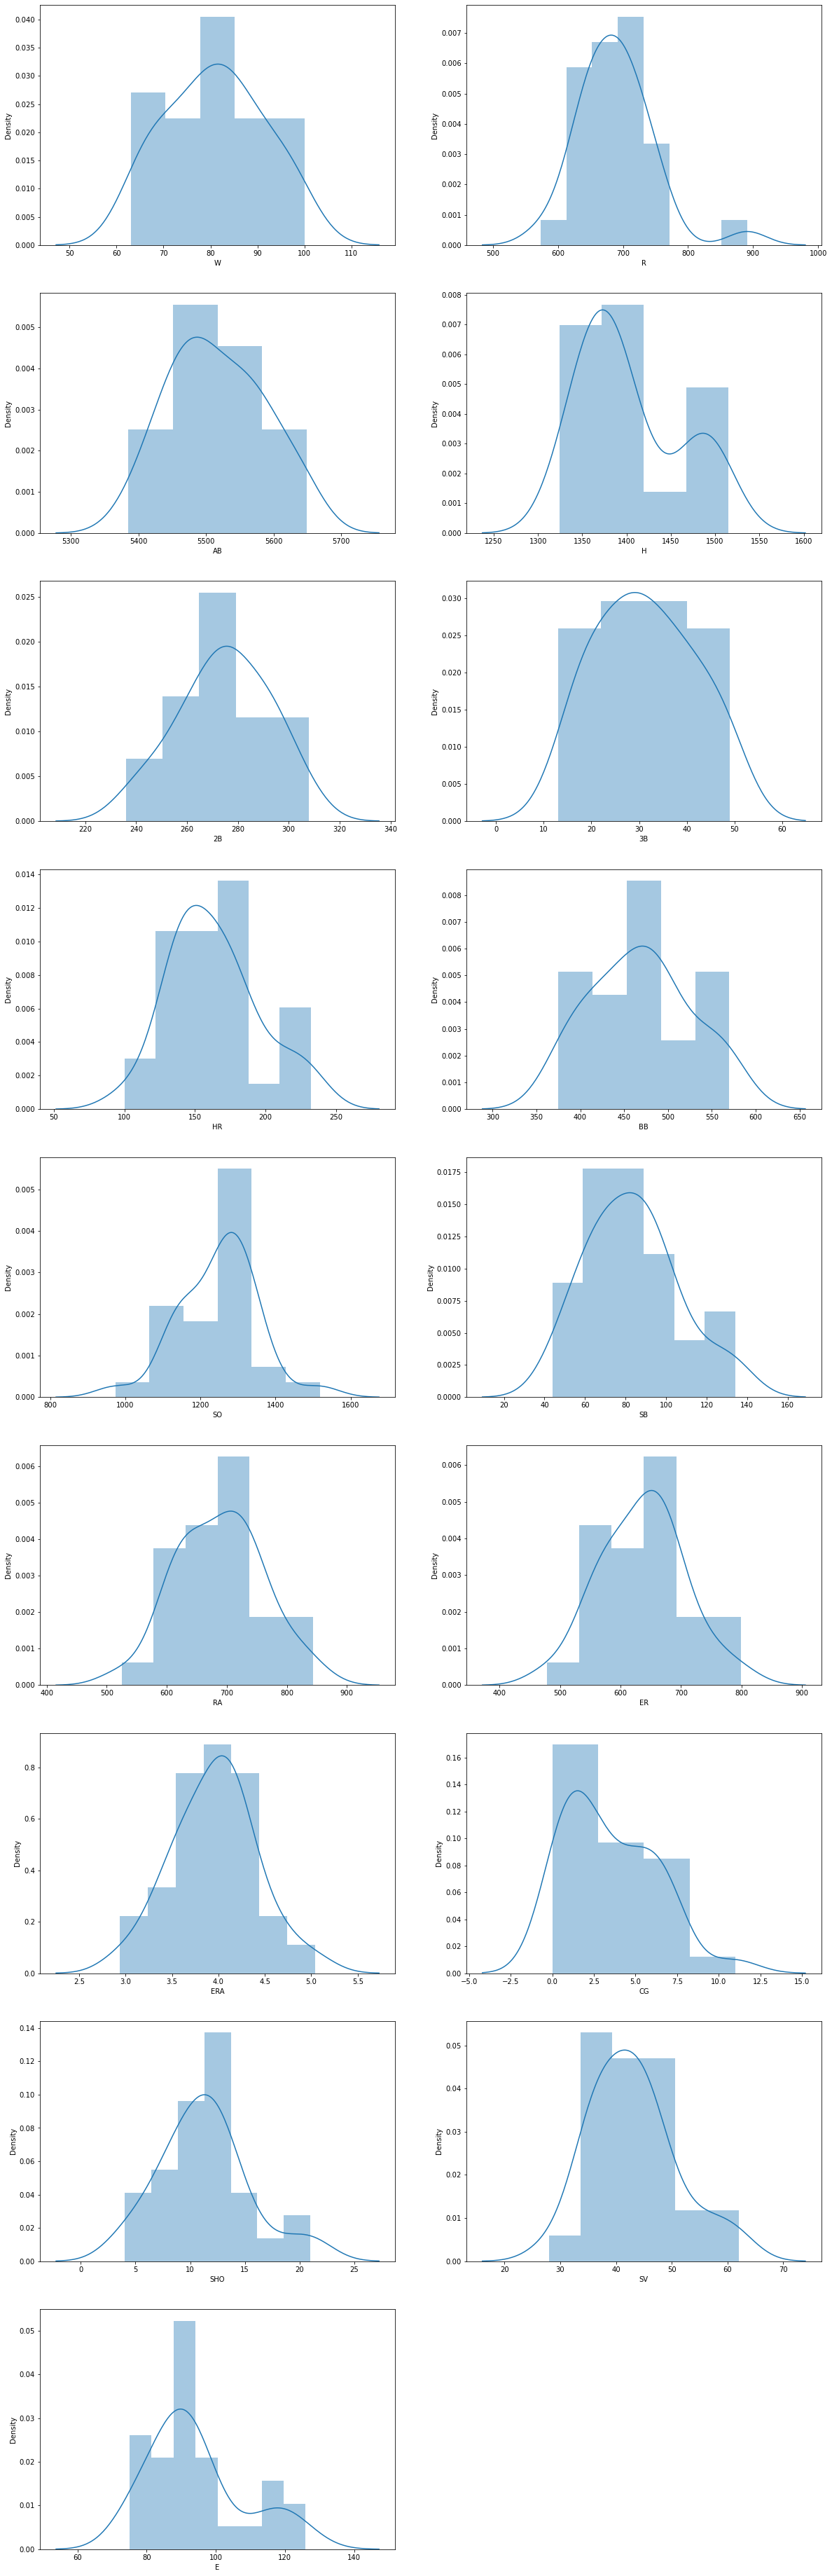

In [11]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
counter=1;
plt.figure(figsize=(20,150))
for column in df.columns:
        plt.subplot(20,2,counter)
        counter=counter+1
        sns.distplot(df[column])

    We can observe -
        H is not normally distributed
        E is not normally distributed
        CG is not normally distributed
        We can see data is skewed

<AxesSubplot:>

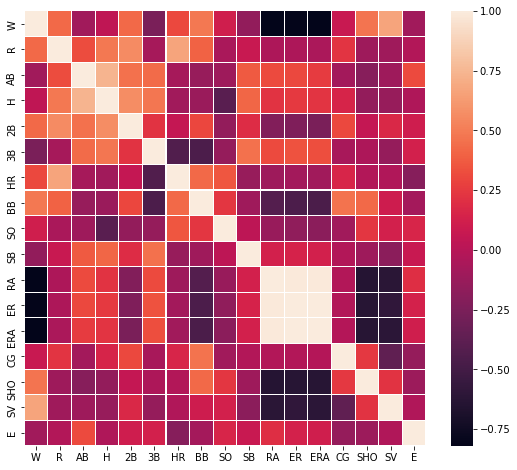

In [12]:
corrmat = df.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, linewidths = 0.1)

    We can observe-
        RA is strongly correlated to ER
        ER is strongly correlated to ERA
        ERA is strongly correlated to RA
        H is strongly correlated to AB

In [13]:
col1=['RA','ER','ERA','H']
col2=['ER','ERA','RA','AB']

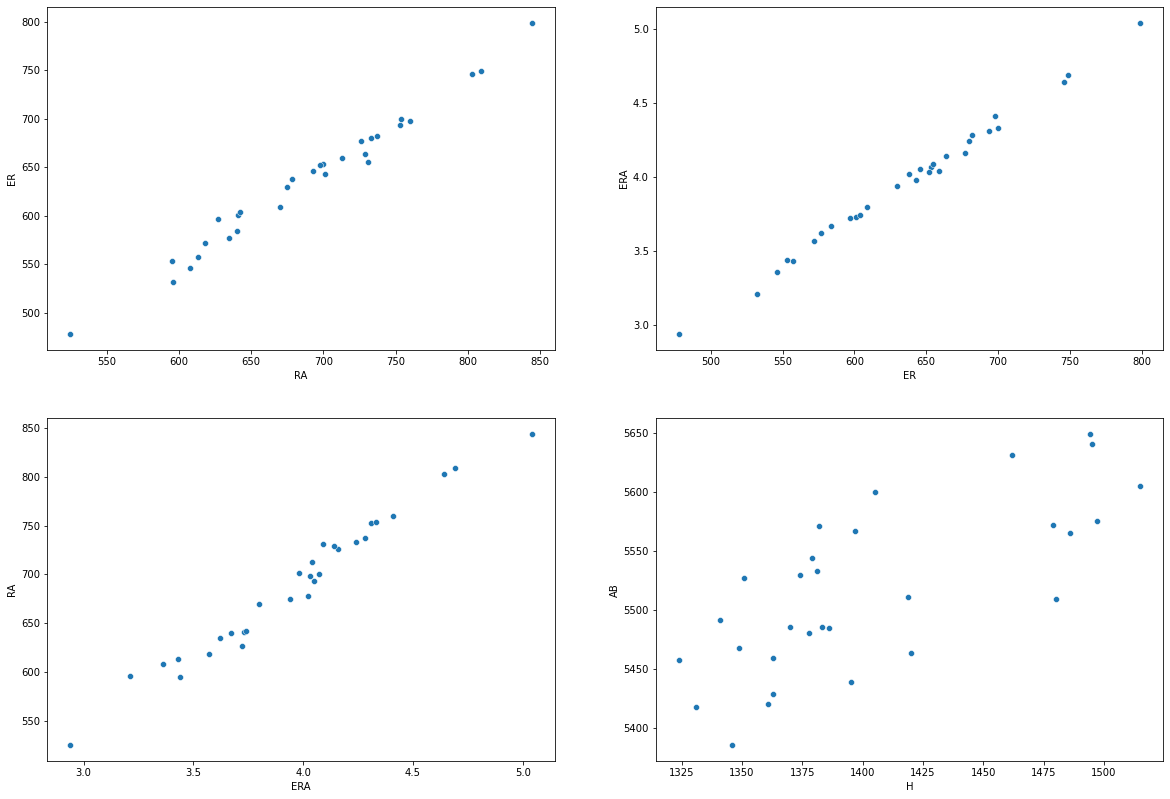

In [14]:
counter=1
plt.figure(figsize=(20,150))
for i in range(0,4):
        plt.subplot(20,2,counter)
        counter=counter+1
        sns.scatterplot(x=col1[i],y=col2[i],data=df)

we can see that coorelation between RA,ERA and ER is 0.99 we can drop the 2 columns

In [15]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

in columns 'R','ERA','SHO','SV','E' Data is skewed

# Removing Outliers

In [16]:
columns = ['R','ERA','SHO','SV','E']
for col in columns:
    median = df[col].median()
    IQR = df[col].quantile(0.75)-df[col].quantile(0.25)
    Barmax =  df[col].quantile(0.75) + 1.5*IQR
    Barmin =  df[col].quantile(0.25) - 1.5*IQR
    df.loc[df[col]>Barmax,col] = Barmax
    df.loc[df[col]<Barmin,col] = Barmin

# confirming removal of outliers

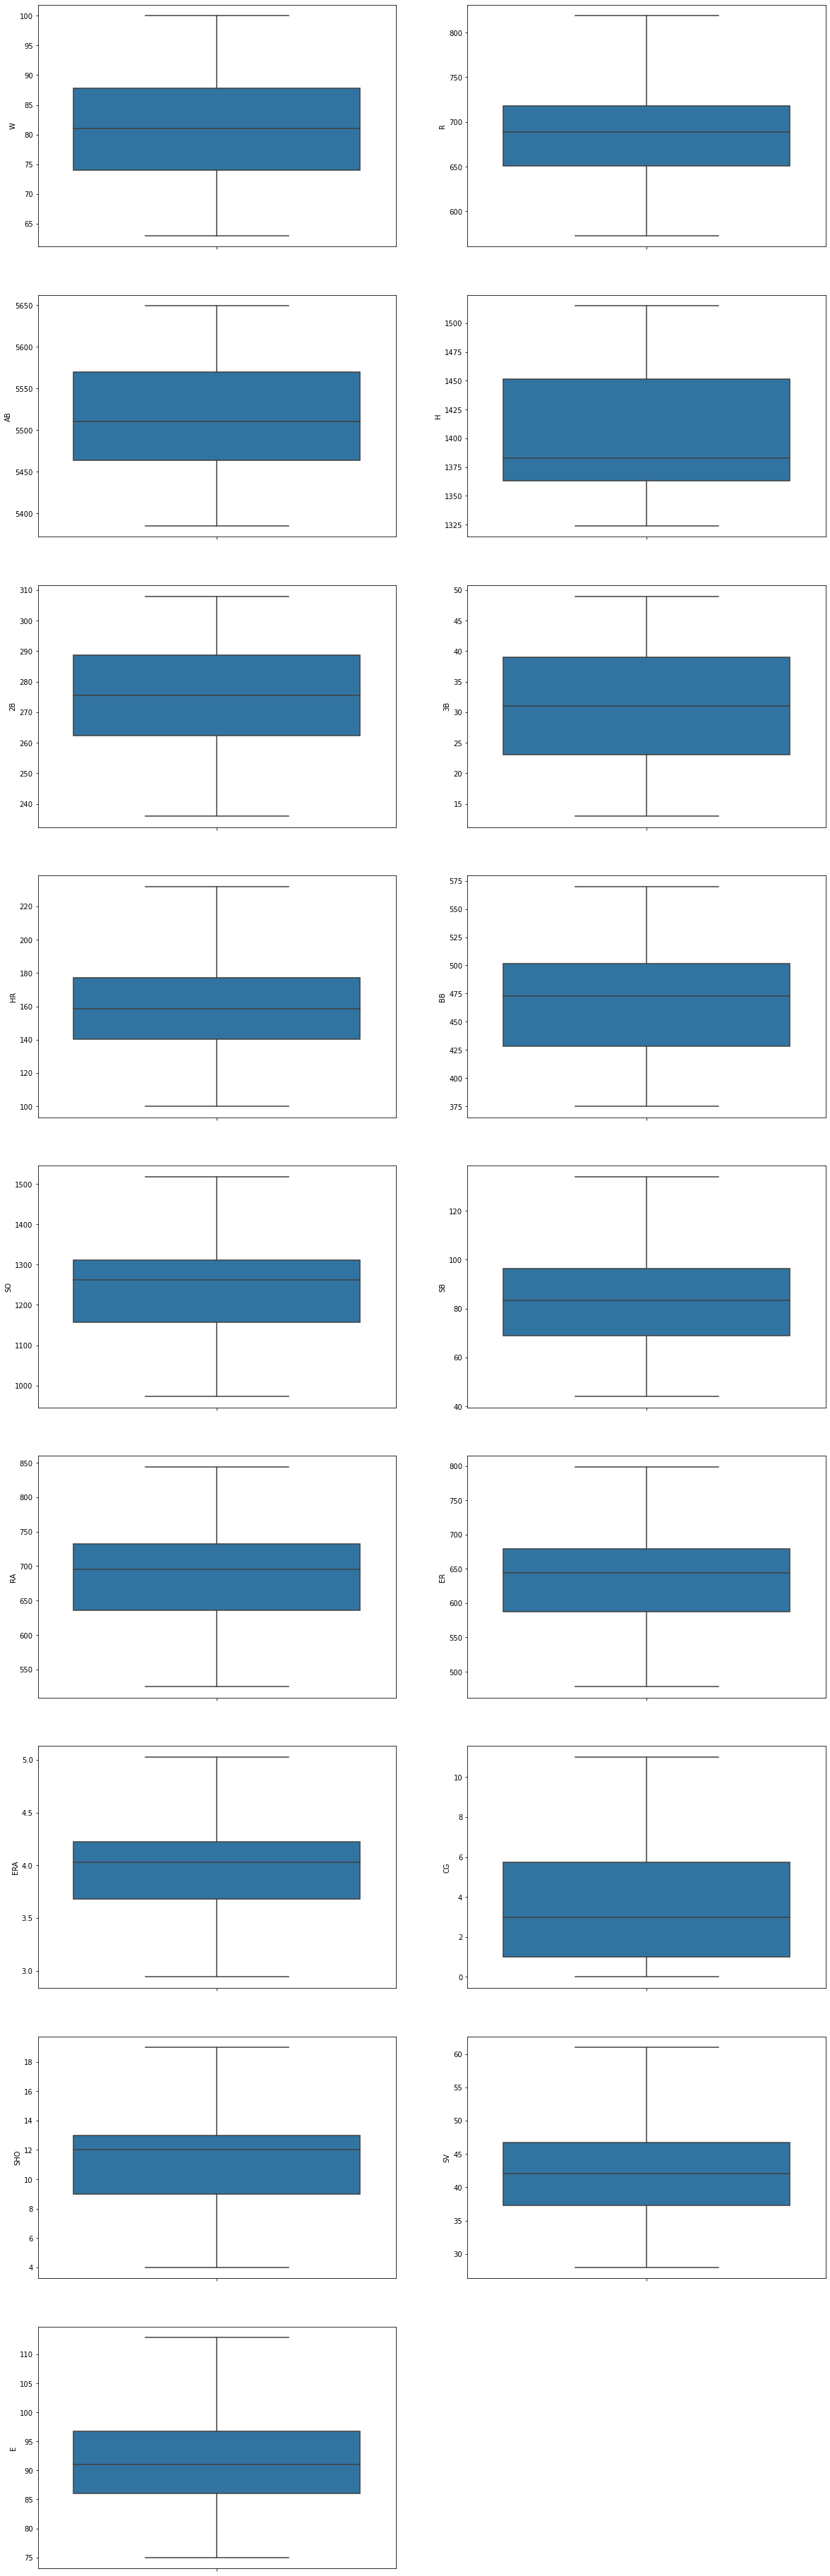

In [17]:
import seaborn as sns

counter=1;
plt.figure(figsize=(20,150))
for column in df.columns:
        plt.subplot(20,2,counter)
        counter=counter+1
        sns.boxplot(y=column,hue=column,data=df)

Outliers are successfuly removed

# Scaling the data

In [18]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(df)
final_df = pd.DataFrame(minmax_df, columns = df.columns)

# Removing Skewness

In [20]:
from sklearn.preprocessing import power_transform
fin_df = final_df.drop(['W','ER'],axis=1)
fin_df_new=power_transform(fin_df)
fin_df_new = pd.DataFrame(fin_df_new,columns=fin_df.columns)

# Confirming Removal of Skewness

In [21]:
fin_df_new.skew()

R      0.004262
AB    -0.018904
H      0.090749
2B    -0.058528
3B    -0.031206
HR     0.000926
BB    -0.028308
SO     0.054296
SB     0.004821
RA    -0.012080
ERA    0.001323
CG     0.086121
SHO   -0.005488
SV     0.001997
E      0.012921
dtype: float64

skewness is successfully removed

In [22]:
fin_df_new = fin_df_new.join(final_df['W'])

In [23]:
x = fin_df_new.drop(['W'],axis=1)
y = fin_df_new["W"]

# Train_Test_split

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
maxAccu=0
maxRS=0
for i in range(30):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    regr = LinearRegression()
    regr.fit(x_train, y_train)
    pred=regr.predict(x_test)
    acc = r2_score(y_test, pred)
    if(acc>maxAccu):
        maxAccu=acc
        maxRS=i
print("Best R2 Score is",maxAccu,"on Random State",maxRS)


Best R2 Score is 0.885057138835074 on Random State 29


In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=29)

# Model Building

Linear Regression->

In [26]:
from sklearn import metrics
regr = LinearRegression()
regr.fit(x_train, y_train)
pred=regr.predict(x_test)
print('R2_score',r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_score 0.885057138835074
MAE: 0.07750590277523058
MSE: 0.008920616681414327
RMSE: 0.09444901630728786


Ridge->

In [27]:
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train) 
pred= rr.predict(x_test)
print(r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

0.8794992933648439
MAE: 0.07872848287593763
MSE: 0.00935195629234778
RMSE: 0.09670551324690739


Lasso->

In [28]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 
pred= model_lasso.predict(x_test)
print(r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

0.9039980046052557
MAE: 0.07766543483917471
MSE: 0.007450632365402964
RMSE: 0.08631704562485305


ElasticNEt

In [29]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(x_train, y_train) 
pred_t= model_enet.predict(x_test)
print(r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred_t))
print('MSE:', metrics.mean_squared_error(y_test, pred_t))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_t)))

0.9039980046052557
MAE: 0.07422957025627581
MSE: 0.007261902781099983
RMSE: 0.08521679870248579


DecisionTreeRegressor->

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

print(r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

-0.17964211015570575
MAE: 0.23423423423423417
MSE: 0.0915510104699294
RMSE: 0.3025739752026426


We can observe that Lasso is performing best when we compare MAE,MSE,RMSE of all the models

# Cross Validation

In [31]:
from sklearn.model_selection import KFold

In [32]:
cv1 = KFold(n_splits=7,shuffle=True)

In [33]:
print(cross_val_score(regr,x,y,scoring='neg_mean_absolute_error',cv=cv1).mean())

-0.12268392075483933


In [34]:
print(cross_val_score(rr,x,y,scoring='neg_mean_absolute_error',cv=cv1).mean())

-0.11377715224752419


In [35]:
print(cross_val_score(model_lasso,x,y,scoring='neg_mean_absolute_error',cv=8).mean())

-0.08800513192278317


In [36]:
print(cross_val_score(model_enet,x,y,scoring='neg_mean_absolute_error',cv=8).mean())

-0.09300845719995247


We can observe lasso model is performing best

# Hypertuning

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
parameter = {
 'max_iter': [1000,2000,3000,4000],
 'alpha': [0.1,0.01,0.001],
 'normalize':[True,False],
 'fit_intercept': [True,False]
}
GCV = GridSearchCV(Lasso(),parameter,cv=5)


In [40]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.01, 0.001],
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 2000, 3000, 4000],
                         'normalize': [True, False]})

In [41]:
GCV.best_params_

{'alpha': 0.01, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False}

# Building Final Model

In [42]:
model_lasso = Lasso(alpha=0.01,fit_intercept=True,max_iter=1000,normalize=False)
model_lasso.fit(x_train, y_train) 
pred= model_lasso.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.07766543483917471
MSE: 0.007450632365402964
RMSE: 0.08631704562485305


# saving the model

In [43]:
import joblib
joblib.dump(model_lasso,"baseball.pkl")


['baseball.pkl']